# **Importance of classroom management for learning motivation**
Hiroshi Sakiyama

In [ ]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


# **0. Abstract**
Promotion of learning motivation is very important in education. The purpose of this study is to find out what motivates pupils to learn. In this study, two novel indices of digital learning frequency and digital learning amount were introduced, and factors affecting learning motivation were investigated. The number of school districts in the states surveyed seemed to be related to political parties, but the correlation coefficient was small (+0.13). A high positive correlation (+0.91) was observed between the digital learning frequency index and the digital learning amount index. Both the frequency of learning and the amount of learning had a little negative correlation (-0.10~-0.22) with the ratio of race/ethnicity or the ratio of lunch support. The local and federal expenditure was found to have a positive effect on digital learning amount with a positive correlation of +0.31. The ratio of "Learning & Curriculum" (LC), "Classroom Management" (CM), "School & District Operations" (SDC) in learning frequency was about 5: 2: 3, and the ratio of Learning & Curriculum was the highest. However, the correlation coefficient between LC and learning frequency (or learning amount) was negative (-0.20). On the other hand, although the ratio of Classroom Management is small, the largest correlation was found between the Classroom Management and the learning frequency (+0.34). It turns out that the positive impact of classroom management on learning was great. The positive impact of school district management was also significant, with some exceptions. Concludingly, it turned out that increasing the ratio of the classroom management learning, especially the Virtual Classroom,  was most effective for pupils' learning. 

# **1. Introduction**


Due to the COVID-19 pandemic, schools were closed and the demand for digital learning was increased as an alternative. At the same time, the digital divide and long-term learning loss are said to be the problem. According to Wikipedia on "[Digital divide](https://en.wikipedia.org/wiki/Digital_divide)", the digital divide in this case seems to refer to inequalities between individuals or geographic areas, usually at different socioeconomic levels or other demographic categories. In a research article titled "[Learning loss due to school closures during the COVID-19 pandemic](https://www.pnas.org/content/118/17/e2022376118)", based on the research in the Netherlands, the authors pointed out that students made little or no progress while learning from home, and that the learning loss was most pronounced among students from disadvantaged homes. 

In particular, long-term learning loss in elementary school is serious. Unlike the generation who learns by their own will, for the elementary school age, an environment where they can learn is important. In addition, what they learn in elementary school is the basis for subsequent learning.

What should education by digital learning be? What is required for digital learning as an alternative to face-to-face lessons? Finding answers to these questions, throughout this investigation, is expected to improve the quality of learning, and also the achievemet of education.

Anyway, let's look at the data without prejudice. (Personally, I want to make an evidence-based consideration.)

# **2. Survey scope**
In this section, the number of school districts and the number of states in the data (Engagement data and District information data) were examined, and the data were found to come from a limited number of school districts in a limited number of states. In addition, judging from the correlation between the blue (Democrat predominant) states and the number of school districts in the data, there was a slight tendency for the blue states to have more samples in the [LearnPlatform](https://learnplatform.com/) data.

In [ ]:
folder_path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
engagement_list = sorted(os.listdir(folder_path))
print(len(engagement_list), 'files in the engagement data')

The `engagement_data` includes data for 233 school districts.

In [ ]:
district = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
print(len(district), 'items in the districts info file')

The number of items in the `districts_info` file matches the number of files in the `engagement_data`.

In [ ]:
print(len(district['state'].value_counts()), 'state names in the data')
print(district['state'].isnull().sum(), 'school districts without the state name')
print(len(district['state']), 'school districts in total')

There are 23 state names in the data. Among the 233 school districts in the data, the state names of the 57 school districts are not shown.

In [ ]:
print('The number of school districts in each state in the data')
print('______________________________')
print(district['state'].value_counts())
print('______________________________')
print('No state name           57        Total 233')

In [ ]:
us_states = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District Of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
district['state_code'] = district['state'].replace(us_states)
num_district = district['state_code'].value_counts().to_frame().reset_index(drop=False)
num_district.columns = ['state_code', 'num_district']

In [ ]:
# https://plotly.com/python/choropleth-maps/#choropleth-maps-with-gochoropleth
fig = go.Figure()
fig.add_trace(
    go.Choropleth(
        locations=num_district.state_code,
        z = num_district.num_district,
        locationmode = 'USA-states',
        colorscale = 'Greens',
        marker_line_color='black',
        geo='geo', 
        colorbar_title = "Number of school district in the data",
    )
)
fig.update_layout(
    title_text = 'States in the data',
    geo_scope='usa',
)

fig.show()

The map above is occasionally not drawn, so a copy of the map is shown below just in case.

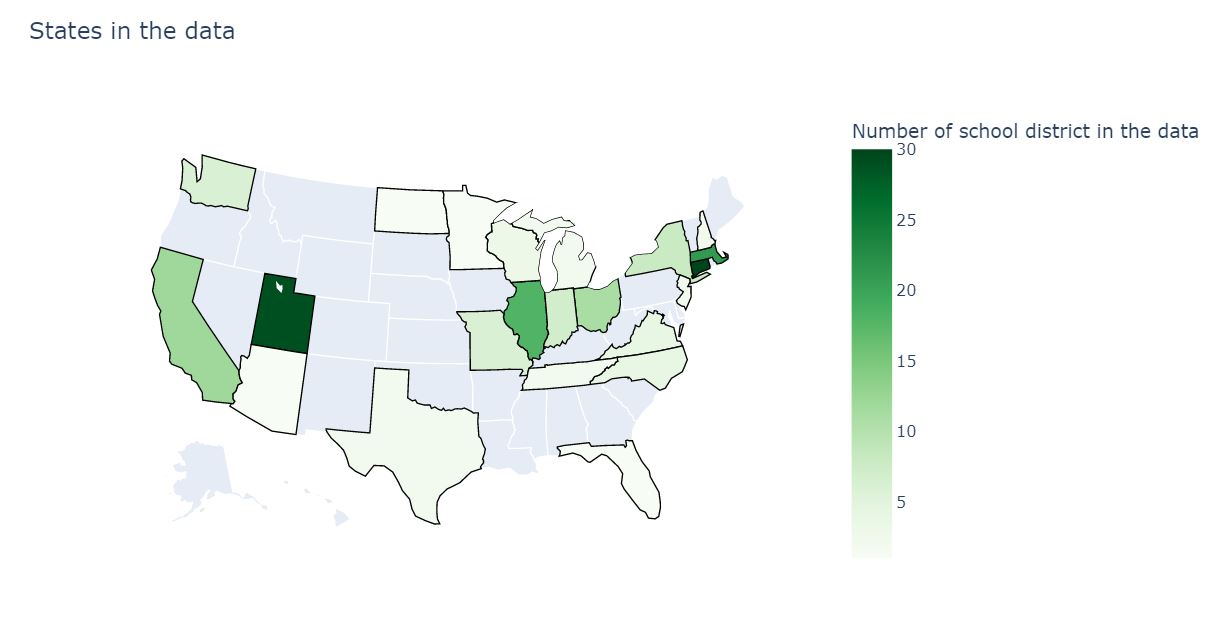

Judging from the map and the number of school districts in the data, the data seems to be from limited school districts in limited states. Actually, Connecticut has the highest sample number of school districts of 30, but this is about one-fifth of the more than 150 school districts in Connecticut ([List of school districts in Connecticut](https://en.wikipedia.org/wiki/List_of_school_districts_in_Connecticut)).

**Relationship with the blue states**

According to Wikipedia ([Red states and blue states](https://en.wikipedia.org/wiki/Red_states_and_blue_states)), red states and blue states have referred to states whose voters predominantly choose either the Republican Party (red) or Democratic Party (blue) presidential and senatorial candidates. In the [LearnPlatform](https://learnplatform.com/) data, when comparing the map above and the map below, the states with the most samples appear to be blue states except Utah.

A map from Wikipedia ([Red states and blue states](https://en.wikipedia.org/wiki/Red_states_and_blue_states))
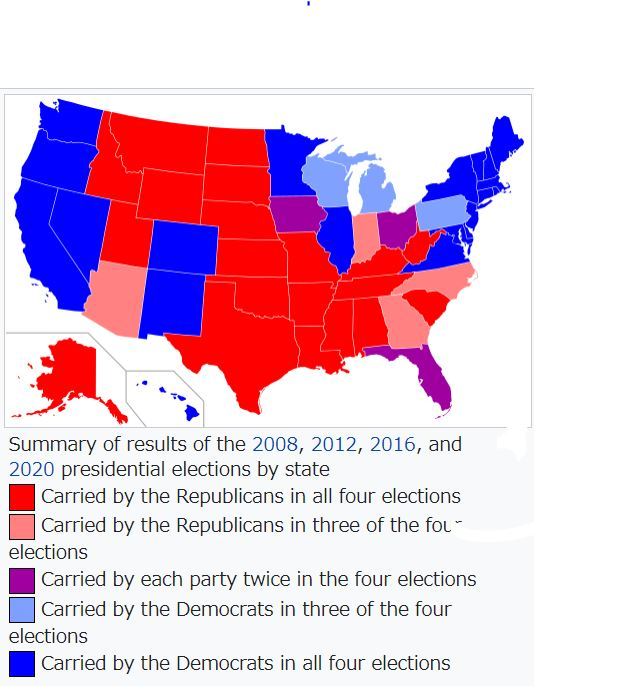

Judging from the small but positive correlation (+0.13 as shown below) between the blue states and the number of school districts in the data (partially hidden), there was a slight tendency for the blue states to have more samples in the [LearnPlatform](https://learnplatform.com/) data.

In [ ]:
Democrats = pd.DataFrame({
    'state':['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Democrats':[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
    'districts':[0, 0, 1, 0, 12, 0, 30, 0, 3, 1, 0, 0, 0, 18, 7, 0, 0, 0, 0, 0, 0, 21, 2, 1, 0, 6, 0, 0, 0, 2, 2, 0, 8, 4, 1, 11, 0, 0, 0, 0, 0, 0, 2, 2, 29, 0, 4, 6, 0, 3, 0]
})
Democrats.style.set_caption("Democrats predominancy and the number of schooldistricts in the data").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Correlation between Democrats and the number of school districts in the data")
res = sns.heatmap(data=Democrats.corr(), annot=True, annot_kws={'size': 18})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.show()

# **3. Digital Learner Access Frequency**
For the purpose of estimating the magnitude of the access rate of digital learners, the average, maximum value, and total of pct_access were examined, and to judge by the total seemed to be appropriate. That is, the total of pct_access was found to be a good metric to evaluate the access frequency of digital learners. Hereafter, it's called the digital learning frequency index.
* pct_access: Percentage of students in the district have at least one page-load event of a given product and on a given day

In [ ]:
cat1 = {'[0, 0.2[': '1', '[0.2, 0.4[': '2', '[0.4, 0.6[': '3', '[0.6, 0.8[': '4', '[0.8, 1[': '5'}
cat2 = {'[0.18, 1[': '1', '[1, 2[': '2'}
cat3 = {'[4000, 6000[': '1', '[6000, 8000[': '2', '[8000, 10000[': '3', '[10000, 12000[': '4', '[12000, 14000[': '5', '[14000, 16000[': '6', '[16000, 18000[': '7', '[18000, 20000[': '8', '[20000, 22000[': '9', '[22000, 24000[': '10', '[32000, 34000[': '11'}
district['pct_black/hispanic'] = district['pct_black/hispanic'].replace(cat1)
district['pct_free/reduced'] = district['pct_free/reduced'].replace(cat1)
district['county_connections_ratio'] = district['county_connections_ratio'].replace(cat2)
district['pp_total_raw'] = district['pp_total_raw'].replace(cat3)

In [ ]:
district['mean'] = -1
district['max'] = -1
district['frequency'] = -1

for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
    meanv = np.mean(pd.to_numeric(data["pct_access"]))
    maxv = np.max(pd.to_numeric(data["pct_access"]))
    sumv = np.sum(pd.to_numeric(data["pct_access"]))
#     print(meanv, maxv, sumv)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'mean'] = meanv
    district.loc[A, 'max'] = maxv
    district.loc[A, 'frequency'] = sumv

district2 = district.sort_values('frequency', ascending = False)
district2 = district2.reset_index()

engagement_list2 = []
for i in range(233):
    engagement_list2 = engagement_list2 + [str(district2['district_id'][i]) + '.csv']
# print('Example of the data')
i = 0
data_num = int(engagement_list2[i][:4])
# 'data' + str(data_num)
data = pd.read_csv(folder_path + '/' + engagement_list2[i])
# print(engagement_list2[i])
# display(district[district['district_id'] == data_num])
# data#[data['time']=='2020-01-01']['pct_access'].sum()

The top 10 school districts are listed below on the basis of the digital learning frequency index. The higher the frequency index, the more frequent the digital learner access. It's impressive to see five Illinois in the top ten.

In [ ]:
district2[['district_id', 'state', 'locale', 'frequency']].head(10).style.set_caption("Top 10 school districts based on the digital learning frequency index").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})

When the time course of pct_access are ordered on the basis of the digital learning frequency index (the sum of pct_access), the index was confirmed to be a good merit of learning frequency. As evidence, only the most frequent and the least frequent examples are shown below. 
The four numbers in each title represent the grades of the four factors, pct_black/hispanic, pct_free/reduced, countyconnectionsratio, and pptotalraw.
* pct_black/hispanic: Percentage of students in the districts identified as Black or Hispanic
5 grade evaluation (1; 0-0.2, 2: 0.2-0.4, 3: 0.4-0.6, 4: 0.6-0.8, 5: 0.8-1)
* pct_free/reduced: Percentage of students in the districts eligible for free or reduced-price lunch
5 grade evaluation (1; 0-0.2, 2: 0.2-0.4, 3: 0.4-0.6, 4: 0.6-0.8, 5: 0.8-1)
* county_connections_ratio: ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households)
2 grade evaluation (1: 0.18-1, 2: 1-2)
* pp_total_raw: Per-pupil total expenditure (sum of local and federal expenditure) of a given school district.
11 grade evaluation (1: 4000-6000, 2: 6000-8000, 3: 8000-10000, 4: 10000-12000, 5: 12000-14000, 6: 14000-16000, 7: 16000-18000, 8: 18000-20000, 9: 20000-22000, 10: 22000-24000, 11: 32000-34000)



Note: the two graphs below are just the copied examples from the hidden full graphs.
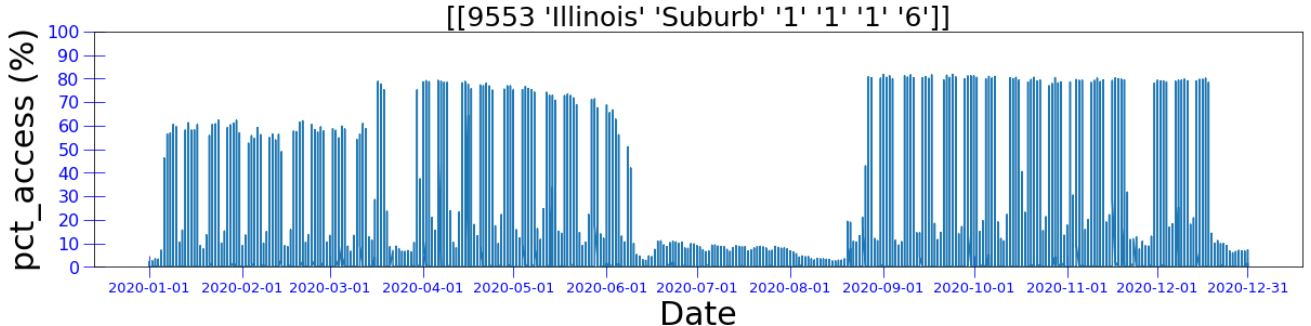
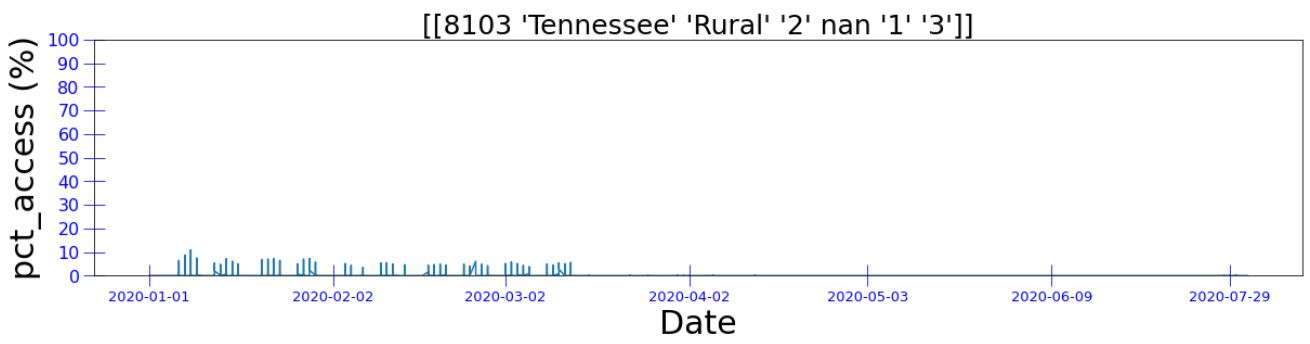
The full results are hidden to avoid redundancy, but you can find them below if necessary. The results are arranged in descending order of learning frequency. 

In [ ]:
print('pct_access versus date plot: each tite includes the information of [district_id, state, locale, pct_black/hispanic, pct_free/reduced, county_connections_ratio, pp_total_raw]')
for i in range(233):
    data_num = int(engagement_list2[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list2[i])

    x = data.time.values
    y = data.pct_access.values


    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot()

    ax.set_title(str(district[district['district_id'] == data_num][['district_id', 'state', 'locale', 'pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']].values), fontsize = 25)
    ax.set_xlabel("Date", size = 30, weight = "light")
    ax.set_ylabel("pct_access (%)", size = 30, weight = "light")

#     ax.set_xticks([0, 365])
    ax.set_ylim([0, 100])

    ax.set_xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 365])
    ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    
    ax.tick_params(axis='x', labelsize= 13)
    ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=16)

    ax.tick_params(direction = "inout", length = 20, colors = "blue")

    ax.plot(x, y)

Different school districts have different percentages of pupils who have learned digitally. Percentages during summer vacation and Saturdays and Sundays are low, but some pupils have learned, and this percentage varies from school district to school district. Are these differences due to school district policy or state policy? Or are there other factors?

# **4. Correlation between digital learning frequency and several factors**

The data includ four factors: pct_black/hispanic, pct_free/reduced, county_connections_ratio, and Learning frequency and county_connections_ratio. Since the distribution of the missing data was different from each other, the correlation between digital learning frequency and each factor was examined one by one.

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 11))
sns.set_palette(sns.color_palette("icefire"))

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pct_black/hispanic'])
district3["pct_black/hispanic"] = pd.to_numeric(district3["pct_black/hispanic"])
sns.regplot(x=district3['pct_black/hispanic'], y=district3['frequency'], line_kws={"linewidth": 5}, ax=ax[0][0])
ax[0][0].set_xlim([0.7,5.3])
# ax[0][0].set_xticklabels(['', '0.0-0.2', '', '0.2-0.4', '', '0.4-0.6', '', '0.6-0.8', '', '0.8-1.0'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][0].set_title('Learning frequency and pct_black/hispanic', fontsize=15, fontweight='bold')
ax[0][0].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pct_free/reduced'])
district3["pct_free/reduced"] = pd.to_numeric(district3["pct_free/reduced"])
sns.regplot(x=district3['pct_free/reduced'], y=district3['frequency'], line_kws={"linewidth": 5}, ax=ax[0][1])
ax[0][1].set_xlim([0.7,5.3])
# ax[0][1].set_xticklabels(['', '0.0-0.2', '', '0.2-0.4', '', '0.4-0.6', '', '0.6-0.8', '', '0.8-1.0'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][1].set_title('Learning frequency and pct_free/reduced', fontsize=15, fontweight='bold')
ax[0][1].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['county_connections_ratio'])
district3["county_connections_ratio"] = pd.to_numeric(district3["county_connections_ratio"])
sns.regplot(x=district3['county_connections_ratio'], y=district3['frequency'], line_kws={"linewidth": 1}, ax=ax[1][0])
ax[1][0].set_xlim([0.9,2.1])
# ax[1][0].set_xticklabels(['', '0.18-1.00', '', '', '', '', '1.00-2.00'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][0].set_title('Learning frequency and county_connections_ratio', fontsize=15, fontweight='bold')
ax[1][0].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pp_total_raw'])
district3["pp_total_raw"] = pd.to_numeric(district3["pp_total_raw"])
plt.figure(figsize=(8,6))
sns.regplot(x=district3['pp_total_raw'], y=district3['frequency'], line_kws={"linewidth": 5}, ax=ax[1][1])
ax[1][1].set_xlim([0.5,11.5])
# ax[1][1].set_xticklabels(['4-6', '6-8', '', '0.2-0.4', '', '0.4-0.6', '', '0.6-0.8', '', '0.8-1.0'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][1].set_title('Learning frequency and pp_total_raw', fontsize=15, fontweight='bold')
ax[1][1].tick_params(direction='in')

fig.suptitle('Learning frequency versus factor plots', fontsize=20, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);

plt.show()


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 11))
sns.set_palette(sns.color_palette("icefire"))

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pct_black/hispanic'])
district3["pct_black/hispanic"] = pd.to_numeric(district3["pct_black/hispanic"])
district4 = district3[['frequency', 'pct_black/hispanic']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[0][0])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][0].set_title('Learning frequency and pct_black/hispanic', fontsize=15, fontweight='bold')
ax[0][0].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pct_free/reduced'])
district3["pct_free/reduced"] = pd.to_numeric(district3["pct_free/reduced"])
district4 = district3[['frequency', 'pct_free/reduced']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[0][1])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][1].set_title('Learning frequency and pct_free/reduced', fontsize=15, fontweight='bold')
ax[0][1].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['county_connections_ratio'])
district3["county_connections_ratio"] = pd.to_numeric(district3["county_connections_ratio"])
district4 = district3[['frequency', 'county_connections_ratio']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[1][0])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][0].set_title('Learning frequency and county_connections_ratio', fontsize=15, fontweight='bold')
ax[1][0].tick_params(direction='in')

district3 = district2.dropna(subset=['frequency'])
district3 = district3.dropna(subset=['pp_total_raw'])
district3["pp_total_raw"] = pd.to_numeric(district3["pp_total_raw"])
district4 = district3[['frequency', 'pp_total_raw']]
district5 = district4.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[1][1])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][1].set_title('Learning frequency and pp_total_raw', fontsize=15, fontweight='bold')
ax[1][1].tick_params(direction='in')

fig.suptitle('Correlation between the digital learning frequency and several factors', fontsize=20, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);


In the correlation between the digital learning frequency and the pct_black/hispanic, a weak but negative correlation (-0.10) was obtained. That is, the larger the percentage of Black or Hispanick, the smaller the learning frequency, but the correlation was weak. 
In the correlation between the digital learning frequency and the pct_free/reduced, a weak but negative correlation (-0.21) was obtained. That is, the larger the percentage of free or reduced-price lunch, the smaller the learning frequency, but the correlation was not strong. 
In the correlation between the digital learning frequency and the county_connections_ratio, a weak correlation (-0.15) was observed; however, due to the imbalanced two-stage evaluation, the relationship is unclear. 
In the correlation between the digital learning frequency and pp_total_raw, a weak but positive correlation (+0.25) was obtained. That is, the larger the local and federal expenditure per pupil, the larger the learning frequency. 
Among the four factors, the effect of the expenditure was the largest and gave the positive effect to the learnig frequency.


# **5. Amount of digital learning**

For the purpose of estimating the amount of digital learning, the total of engagement_index was found to be a good metric. Hereafter, it's called the digital learning amount index.
* engagement_index: Total page-load events per one thousand students of a given product and on a given day

In [ ]:
district['total_amount'] = -1

for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
#     sumv = np.sum(data.engagement_index.values)      pd.to_numeric(district3["pct_free/reduced"])
    sumv = np.sum(pd.to_numeric(data["engagement_index"]))
#     print(sumv)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'total_amount'] = sumv

district6 = district.sort_values('total_amount', ascending = False)
district6 = district6.reset_index()

engagement_list3 = []
for i in range(233):
    engagement_list3 = engagement_list3 + [str(district2['district_id'][i]) + '.csv']
# print('Example of the data')
i = 0
data_num = int(engagement_list3[i][:4])
# 'data' + str(data_num)
data = pd.read_csv(folder_path + '/' + engagement_list3[i])
# print(engagement_list3[i])
# display(district[district['district_id'] == data_num])
# data#[data['time']=='2020-01-01']['engagement_index'].sum()

The top 10 school districts are listed below on the basis of the digital learning amount index. The larger the amount index, the larger the amount of digital learning. It's impressive to see five Illinois in the top ten again. 

In [ ]:
district6[['district_id', 'state', 'locale', 'total_amount']].head(10).style.set_caption("Top 10 school districts based on the amount of digital learning").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})

A good correlation was observed between the digital learning frequency index and the digital learning amount index as shown below.

In [ ]:
district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['frequency'])
plt.figure(figsize=(6,6))
plt.title("Amount of learning versus learning frequency", fontsize=20, fontweight='bold')
res = sns.regplot(x=district3['frequency'], y=district3['total_amount'])
res.set_xlabel('Learning frequency index', fontsize = 22)
res.set_ylabel('Learning amount index', fontsize = 22)
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.tick_params(direction='in')
plt.show()

In [ ]:
district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['frequency'])
district4 = district3[['total_amount', 'frequency']]
district5 = district4.corr()
plt.figure(figsize=(8,6))
plt.title("Correlation between the learning frequency index and the learning amount index", fontsize=20, fontweight='bold')
res = sns.heatmap(data=district5, annot=True, annot_kws={'size': 18})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.show()

# **6. Correlation between the amount of digital learning and several factors**
As expected, the impact of factors on the amount of digital learning tended to be very similar to the impact on the frequency of digital learning.

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 11))
sns.set_palette(sns.color_palette("icefire"))

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pct_black/hispanic'])
district3["pct_black/hispanic"] = pd.to_numeric(district3["pct_black/hispanic"])
sns.regplot(x=district3['pct_black/hispanic'], y=district3['total_amount'], line_kws={"linewidth": 5}, ax=ax[0][0])
ax[0][0].set_xlim([0.7,5.3])
# ax[0][0].set_xticklabels(['', '0.0-0.2', '', '0.2-0.4', '', '0.4-0.6', '', '0.6-0.8', '', '0.8-1.0'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][0].set_title('Learning amount and pct_black/hispanic', fontsize=15, fontweight='bold')
ax[0][0].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pct_free/reduced'])
district3["pct_free/reduced"] = pd.to_numeric(district3["pct_free/reduced"])
sns.regplot(x=district3['pct_free/reduced'], y=district3['total_amount'], line_kws={"linewidth": 5}, ax=ax[0][1])
ax[0][1].set_xlim([0.7,5.3])
# ax[0][1].set_xticklabels(['', '0.0-0.2', '', '0.2-0.4', '', '0.4-0.6', '', '0.6-0.8', '', '0.8-1.0'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][1].set_title('Learning amount and pct_free/reduced', fontsize=15, fontweight='bold')
ax[0][1].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['county_connections_ratio'])
district3["county_connections_ratio"] = pd.to_numeric(district3["county_connections_ratio"])
sns.regplot(x=district3['county_connections_ratio'], y=district3['total_amount'], line_kws={"linewidth": 1}, ax=ax[1][0])
ax[1][0].set_xlim([0.9,2.1])
# ax[1][0].set_xticklabels(['', '0.18-1.00', '', '', '', '', '1.00-2.00'], fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][0].set_title('Learning amount and county_connections_ratio', fontsize=15, fontweight='bold')
ax[1][0].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pp_total_raw'])
district3["pp_total_raw"] = pd.to_numeric(district3["pp_total_raw"])
sns.regplot(x=district3['pp_total_raw'], y=district3['total_amount'], line_kws={"linewidth": 5}, ax=ax[1][1])
ax[1][1].set_xlim([0.5,11.5])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][1].set_title('Learning amount and pp_total_raw', fontsize=15, fontweight='bold')
ax[1][1].tick_params(direction='in')

fig.suptitle('Learning amount versus factor plots', fontsize=20, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);

plt.show()



In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 11))
sns.set_palette(sns.color_palette("icefire"))

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pct_black/hispanic'])
district3["pct_black/hispanic"] = pd.to_numeric(district3["pct_black/hispanic"])
district4 = district3[['total_amount', 'pct_black/hispanic']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[0][0])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][0].set_title('Learning amount and pct_black/hispanic', fontsize=15, fontweight='bold')
ax[0][0].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pct_free/reduced'])
district3["pct_free/reduced"] = pd.to_numeric(district3["pct_free/reduced"])
district4 = district3[['total_amount', 'pct_free/reduced']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[0][1])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[0][1].set_title('Learning amount and pct_free/reduced', fontsize=15, fontweight='bold')
ax[0][1].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['county_connections_ratio'])
district3["county_connections_ratio"] = pd.to_numeric(district3["county_connections_ratio"])
district4 = district3[['total_amount', 'county_connections_ratio']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[1][0])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][0].set_title('Learning amount and county_connections_ratio', fontsize=15, fontweight='bold')
ax[1][0].tick_params(direction='in')

district3 = district6.dropna(subset=['total_amount'])
district3 = district3.dropna(subset=['pp_total_raw'])
district3["pp_total_raw"] = pd.to_numeric(district3["pp_total_raw"])
district4 = district3[['total_amount', 'pp_total_raw']]
district5 = district4.corr()
sns.heatmap(data=district5, annot=True, annot_kws={'size': 18}, ax=ax[1][1])
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax[1][1].set_title('Learning amount and pp_total_raw', fontsize=15, fontweight='bold')
ax[1][1].tick_params(direction='in')

fig.suptitle('Correlation between the amount of digital learning and several factors', fontsize=20, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);


The results of the correlation so far are summarized in the table below. The largest one is the positive correlation (+0.31) between the amount of digital learning and the local and federal expenditure (pp_total_raw), showing the very positive impact of local and federal expenditure on digital learning. 

In [ ]:
correlation = pd.DataFrame({
    'factor':['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
    'degital learning frequency':['-0.10', '-0.21', '-0.15', '+0.25'],
    'amount of digital learning':['-0.12', '-0.22', '-0.13', '+0.31']
})
correlation.style.set_caption("Impact of several factors on digital learning").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})


# **7. Digital Learning Products**

In this section, the product information data were examined.
* LP ID: The unique identifier of the product.
* Product Name: Name of the specific product.
* Provider/Company Name: Name of the product provider.
* Sector(s): Sector of education where the product is used.
* Primary Essential Function: The basic function of the product. 

In [ ]:
products = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')

In [ ]:
# https://www.kaggle.com/ruchi798/covid-19-impact-on-digital-learning-eda-w-b
Function1 = []
Function2 = []
for s in products["Primary Essential Function"]:
    if(not pd.isnull(s)):
        s1 = s.split("-",1)[0].strip()
        Function1.append(s1)
    else:
        Function1.append(np.nan)
    
    if(not pd.isnull(s)):
        s2 = s.split("-",1)[1].strip()
        Function2.append(s2)
    else:
        Function2.append(np.nan)
products["Function1"] = Function1
products["Function2"] = Function2

In [ ]:
print('The number of unique "LP ID": ', len(products[~products['LP ID'].duplicated()]))
print('The number of unique "Product Name": ', len(products[~products['Product Name'].duplicated()]))
print('The number of unique "Provider/Company Name": ', len(products[~products['Provider/Company Name'].duplicated()]))


The target sectors of the products are shown below. The most products were confirmed to cover the pre-kindergarten to 12 years old (PreK-12) category. 
About half of the products cover the higher education (Higher Ed) category, and about one-third of the products cover the Corporate category.

In [ ]:
sectors = products.copy()#[['Sector(s)']]
sectors['ratio'] = -1
sectors = sectors[['Sector(s)', 'ratio']]
sector_names = sectors.copy()[~sectors.copy()['Sector(s)'].duplicated()]
sector_names
sector_ratio = []
for i in range(len(sector_names.values)):
    sector_ratio = sector_ratio + [(sectors['Sector(s)'] == sector_names['Sector(s)'].values[i]).sum()]
sector_names['ratio'] = sector_ratio
# print(sector_names)
sector_names = sector_names.sort_values('ratio')

colors = ["pink", "yellow", "gold", "coral", "red"]
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('white')
patches, texts = plt.pie(sector_names.ratio, 
                         labels=['', 'Others', '', 'PreK-12 + Higher Ed', 'PreK-12 + Higher Ed + Corporate', 'PreK-12'],
#                          ['PreK-12', 'PreK-12; Higher Ed; Corporate', 'PreK-12; Higher Ed', 'others', '', ''], 
                         counterclock=True, startangle=90, 
#                          labeldistance=0.7,
                         textprops={'color': "black", 'weight': "bold"}, 
#                          autopct="%1.1f%%", 
                         wedgeprops={'linewidth': 3, 'edgecolor':"white"}, 
                         colors=colors)
plt.title("Target sectors of the product", size=30)
for t in texts:
#     t.set_horizontalalignment('center')
    t.set_size(16)

As the basic function of the product, the products are labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. The product function ratio was found to be about LC : CM : SDO = 75 : 13 : 12.

In [ ]:
products[['LP ID', 
#           'URL', 
#           'Product Name', 
#           'Provider/Company Name', 
#           'Sector(s)', 
#           'Primary Essential Function', 
          'Function1', 
          'Function2']]
# products[['LP ID', 'Function1', 'Function2']].to_csv('ProductFunction.csv', index=False)

Function = products.copy()
Function1_names = Function['Function1'].copy()[~products.copy()['Function1'].duplicated()]
Function1_ratio = []
for s in Function1_names.values:
    Function1_ratio = Function1_ratio + [(Function['Function1'] == s).sum()]
# Function1_ratio   [272, 34, 30, 16, 0]
# len(Function) - (272 + 34 + 30 + 16)   20
Function1_ratio = [272, 34, 30, 16, 20]     # total 372
# Function1_names = Function1_names.sort_values('ratio')
colors = ["pink", "coral", "gold", "yellow", "gray"]
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('white')
patches, texts = plt.pie(Function1_ratio, 
                         labels=['LC', 'CM', 'SDO', 'LC/CM/SDO', ''],
                         counterclock=False, startangle=90, 
#                          labeldistance=0.7,
                         textprops={'color': "black", 'weight': "bold"}, 
#                          autopct="%1.1f%%", 
                         wedgeprops={'linewidth': 3, 'edgecolor':"white"}, 
                         colors=colors)
plt.title("Basic function of the product", size=30)
for t in texts:
#     t.set_horizontalalignment('center')
    t.set_size(16)

# **8. Product function in real digital learning**

In [ ]:
func1 = {'13117': 'LC', '66933': 'LC', '50479': 'LC', '92993': 'LC', '73104': 'LC', '37600': 'LC', '18663': 'LC', '65131': 'LC', '26491': 'LC', '56441': 'LC', '89802': 'LC', '72703': 'CM', '76889': 'SDO', '49563': 'LC', '55589': 'LC', '84652': 'LC', '16633': 'LC', '47364': 'LC', '50104': 'LC', '47267': 'CM', '76649': 'SDO', '96116': 'LC', '85975': 'LC', '94158': 'LC', '64947': 'LC', '15225': 'LC', '14168': 'LC', '28633': 'LC', '71279': 'LC', '98001': 'LC/CM/SDO', '43491': 'LC', '35971': 'LC', '50712': 'LC', '57724': 'LC', '95253': 'LC', '56695': 'SDO', '54430': 'LC', '26970': 'LC', '98402': 'LC', '13983': 'LC/CM/SDO', '19044': 'LC', '16753': 'LC', '83076': 'LC', '23927': 'CM', '86703': 'CM', '77698': 'LC', '72713': 'LC', '30851': 'LC/CM/SDO', '95731': 'LC', '99916': 'LC/CM/SDO', '11206': 'LC', '33185': 'CM', '48333': 'CM', '69827': 'SDO', '16406': 'LC', '21917': 'CM', '52448': 'CM', '51340': 'LC', '95767': 'CM', '33624': 'LC', '80616': 'LC', '33562': 'ND', '35007': 'LC', '72784': 'SDO', '18904': 'LC', '50762': 'LC', '59257': 'LC', '26881': 'LC', '84217': 'LC', '24711': 'LC', '29322': 'LC', '52175': 'LC', '30025': 'LC', '29921': 'LC', '25559': 'LC', '10650': 'LC', '41587': 'LC', '36102': 'LC', '94954': 'LC', '92867': 'LC', '57949': 'LC', '81127': 'LC', '16468': 'LC', '55031': 'LC', '97280': 'LC', '62934': 'LC', '19181': 'LC', '26372': 'LC', '51853': 'LC', '86575': 'LC', '73101': 'LC', '44853': 'SDO', '90440': 'LC', '37017': 'LC', '92871': 'SDO', '65358': 'LC', '64948': 'LC', '49570': 'LC', '23483': 'LC', '49062': 'LC', '20594': 'LC', '98265': 'LC', '80144': 'LC', '83862': 'LC', '64915': 'LC', '55355': 'LC', '84007': 'LC', '95859': 'CM', '64998': 'LC', '56218': 'SDO', '49094': 'CM', '54550': 'LC', '20069': 'SDO', '93256': 'LC', '71805': 'LC', '50580': 'SDO', '56028': 'LC', '12803': 'LC', '30593': 'LC', '54827': 'LC', '85072': 'LC', '49751': 'LC', '55450': 'LC', '64838': 'LC', '39841': 'LC', '58986': 'LC', '94264': 'LC', '86059': 'LC', '78586': 'LC', '14124': 'LC/CM/SDO', '73323': 'CM', '41581': 'LC', '93742': 'LC', '75451': 'LC', '26753': 'LC', '14769': 'LC', '94324': 'LC', '32050': 'CM', '13699': 'SDO', '68490': 'LC', '13496': 'LC', '25793': 'SDO', '69429': 'SDO', '24744': 'LC', '11406': 'LC', '61384': 'LC', '83394': 'ND', '61292': 'LC', '93690': 'LC', '61441': 'LC', '17182': 'LC', '50724': 'LC', '54794': 'SDO', '63335': 'LC', '57343': 'LC', '40928': 'LC', '58235': 'LC', '32213': 'SDO', '63178': 'ND', '26696': 'CM', '49571': 'LC', '25585': 'LC', '59304': 'CM', '78662': 'CM', '65277': 'CM', '34887': 'LC', '91030': 'LC', '78063': 'SDO', '35237': 'SDO', '37153': 'LC', '67035': 'LC', '76229': 'LC', '52615': 'LC', '24120': 'LC', '32340': 'ND', '55032': 'CM', '50692': 'CM', '73952': 'LC', '81236': 'LC/CM/SDO', '28525': 'LC', '71275': 'LC', '67431': 'LC', '43149': 'SDO', '85991': 'ND', '57293': 'LC', '85682': 'SDO', '10533': 'LC', '88885': 'LC', '29286': 'LC', '94058': 'LC', '78818': 'LC', '48625': 'LC', '22741': 'SDO', '61945': 'CM', '91165': 'LC', '65797': 'LC', '76214': 'LC', '64850': 'CM', '76122': 'LC', '19334': 'LC', '70740': 'LC', '39004': 'LC', '72676': 'LC', '11585': 'LC', '74653': 'LC', '28456': 'LC', '60051': 'LC', '46123': 'SDO', '24342': 'LC', '89267': 'LC', '37891': 'ND', '50168': 'LC', '89688': 'LC', '97209': 'LC', '79673': 'SDO', '18982': 'CM', '70167': 'LC', '49521': 'LC/CM/SDO', '21298': 'LC', '24829': 'LC', '52196': 'LC', '45601': 'SDO', '25267': 'LC', '38871': 'LC/CM/SDO', '28324': 'LC', '50129': 'LC', '11069': 'LC', '33946': 'LC', '87342': 'LC', '80560': 'LC', '92844': 'LC', '61517': 'LC', '96706': 'LC', '26533': 'LC', '68019': 'LC', '28504': 'LC/CM/SDO', '86775': 'LC', '45716': 'ND', '36692': 'LC', '17941': 'LC', '78247': 'LC', '29790': 'LC', '28199': 'LC', '41675': 'LC', '11237': 'LC', '15254': 'LC', '22856': 'LC', '88925': 'LC', '53775': 'ND', '60825': 'LC', '81654': 'LC', '42410': 'LC', '42608': 'LC', '83118': 'LC', '84342': 'SDO', '10745': 'LC', '16164': 'LC', '69757': 'LC', '80473': 'LC', '37479': 'SDO', '69706': 'CM', '44025': 'LC', '45811': 'ND', '98102': 'LC', '26407': 'LC', '84099': 'ND', '36859': 'LC/CM/SDO', '72468': 'LC/CM/SDO', '83270': 'LC', '76661': 'LC', '13945': 'CM', '11286': 'LC', '42725': 'LC', '26512': 'LC', '48708': 'LC', '46819': 'LC', '79578': 'LC', '91873': 'LC', '98468': 'LC', '49050': 'LC', '16401': 'LC', '50282': 'CM', '52758': 'LC', '90153': 'LC', '77430': 'SDO', '19184': 'SDO', '68713': 'LC', '99580': 'CM', '96217': 'LC', '31827': 'LC/CM/SDO', '41424': 'LC', '51288': 'LC', '92894': 'LC', '68845': 'ND', '72758': 'LC/CM/SDO', '49687': 'LC/CM/SDO', '20619': 'CM', '63740': 'LC', '18090': 'LC', '45005': 'LC', '77713': 'LC', '33326': 'LC', '50626': 'CM', '86294': 'LC', '90929': 'LC', '53399': 'ND', '28701': 'LC/CM/SDO', '69863': 'LC/CM/SDO', '17920': 'LC', '48984': 'SDO', '59434': 'LC', '92918': 'ND', '31956': 'LC', '74174': 'LC', '87762': 'ND', '20677': 'LC', '32032': 'CM', '66838': 'LC', '79652': 'LC', '29158': 'LC', '37373': 'LC', '12816': 'LC', '96034': 'LC', '18697': 'LC', '57084': 'LC', '64124': 'LC', '47261': 'LC', '35201': 'LC', '36620': 'LC', '54110': 'LC', '39623': 'LC', '78730': 'ND', '62538': 'LC', '71152': 'LC', '55816': 'LC', '95967': 'LC', '11910': 'LC', '37948': 'SDO', '30008': 'CM', '48010': 'LC', '80972': 'LC', '99789': 'LC', '75206': 'LC', '77320': 'LC', '29806': 'LC', '98845': 'CM', '28467': 'LC', '23644': 'LC', '82101': 'LC', '70878': 'LC', '79295': 'LC', '11313': 'LC', '69610': 'ND', '19750': 'LC', '35098': 'ND', '22767': 'CM', '26248': 'ND', '94218': 'CM', '98128': 'LC', '21650': 'LC', '64581': 'LC', '83704': 'LC', '70706': 'LC', '13282': 'LC', '24396': 'LC', '22241': 'LC', '93376': 'CM', '88065': 'SDO', '37805': 'LC', '32555': 'LC', '87841': 'ND', '36254': 'ND'}
func2 = {'13117': 'Digital Learning Platforms', '66933': 'Digital Learning Platforms', '50479': 'Sites, Resources & Reference - Games & Simulations', '92993': 'Digital Learning Platforms', '73104': 'Digital Learning Platforms', '37600': 'Digital Learning Platforms', '18663': 'Digital Learning Platforms', '65131': 'Courseware & Textbooks', '26491': 'Study Tools - Q&A', '56441': 'Sites, Resources & Reference - Streaming Services', '89802': 'Study Tools', '72703': 'Teacher Resources - Professional Learning', '76889': 'Learning Management Systems (LMS)', '49563': 'Content Creation & Curation', '55589': 'Digital Learning Platforms', '84652': 'Digital Learning Platforms', '16633': 'Sites, Resources & Reference', '47364': 'Online Course Providers & Technical Skills Development', '50104': 'Study Tools', '47267': 'Classroom Engagement & Instruction - Communication & Messaging', '76649': 'School Management Software - SSO', '96116': 'Study Tools', '85975': 'Digital Learning Platforms', '94158': 'Sites, Resources & Reference', '64947': 'Study Tools', '15225': 'Sites, Resources & Reference - Thesaurus & Dictionary', '14168': 'Sites, Resources & Reference - Thesaurus & Dictionary', '28633': 'Digital Learning Platforms', '71279': 'Digital Learning Platforms', '98001': 'Other', '43491': 'Digital Learning Platforms', '35971': 'Digital Learning Platforms', '50712': 'Sites, Resources & Reference', '57724': 'Study Tools', '95253': 'Digital Learning Platforms', '56695': 'Data, Analytics & Reporting', '54430': 'Sites, Resources & Reference - Encyclopedia', '26970': 'Sites, Resources & Reference', '98402': 'Digital Learning Platforms', '13983': 'Other', '19044': 'Content Creation & Curation', '16753': 'Digital Learning Platforms', '83076': 'Study Tools', '23927': 'Classroom Engagement & Instruction - Classroom Management', '86703': 'Classroom Engagement & Instruction - Classroom Management', '77698': 'Sites, Resources & Reference - Digital Collection & Repository', '72713': 'Sites, Resources & Reference', '30851': 'Other', '95731': 'Content Creation & Curation', '99916': 'Other', '11206': 'Sites, Resources & Reference', '33185': 'Classroom Engagement & Instruction - Assessment & Classroom Response', '48333': 'Virtual Classroom - Video Conferencing & Screen Sharing', '69827': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '16406': 'Study Tools', '21917': 'Classroom Engagement & Instruction - Communication & Messaging', '52448': 'Classroom Engagement & Instruction - Communication & Messaging', '51340': 'Study Tools', '95767': 'Classroom Engagement & Instruction - Classroom Management', '33624': 'Sites, Resources & Reference', '80616': 'Digital Learning Platforms', '33562': 'ND', '35007': 'Digital Learning Platforms', '72784': 'Data, Analytics & Reporting - Student Information Systems (SIS)', '18904': 'Sites, Resources & Reference', '50762': 'Sites, Resources & Reference - Digital Collection & Repository', '59257': 'Content Creation & Curation', '26881': 'Digital Learning Platforms', '84217': 'Sites, Resources & Reference - Digital Collection & Repository', '24711': 'Study Tools', '29322': 'Digital Learning Platforms', '52175': 'Sites, Resources & Reference', '30025': 'Courseware & Textbooks', '29921': 'Courseware & Textbooks', '25559': 'Digital Learning Platforms', '10650': 'Sites, Resources & Reference', '41587': 'Career Planning & Job Search', '36102': 'Sites, Resources & Reference - Games & Simulations', '94954': 'Digital Learning Platforms', '92867': 'Sites, Resources & Reference - Games & Simulations', '57949': 'Study Tools', '81127': 'Sites, Resources & Reference', '16468': 'Sites, Resources & Reference - Digital Collection & Repository', '55031': 'Digital Learning Platforms', '97280': 'Digital Learning Platforms', '62934': 'Digital Learning Platforms', '19181': 'Study Tools', '26372': 'Sites, Resources & Reference - Digital Collection & Repository', '51853': 'Sites, Resources & Reference - Games & Simulations', '86575': 'Digital Learning Platforms', '73101': 'Content Creation & Curation', '44853': 'Human Resources', '90440': 'Digital Learning Platforms', '37017': 'Content Creation & Curation', '92871': 'Data, Analytics & Reporting - Student Information Systems (SIS)', '65358': 'Content Creation & Curation', '64948': 'Sites, Resources & Reference - Games & Simulations', '49570': 'Sites, Resources & Reference', '23483': 'Sites, Resources & Reference', '49062': 'Digital Learning Platforms', '20594': 'Study Tools', '98265': 'Study Tools', '80144': 'Study Tools - Q&A', '83862': 'Digital Learning Platforms', '64915': 'Digital Learning Platforms', '55355': 'Sites, Resources & Reference', '84007': 'Courseware & Textbooks', '95859': 'Classroom Engagement & Instruction - Communication & Messaging', '64998': 'Digital Learning Platforms', '56218': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '49094': 'Classroom Engagement & Instruction - Classroom Management', '54550': 'Digital Learning Platforms', '20069': 'Learning Management Systems (LMS)', '93256': 'Sites, Resources & Reference - Digital Collection & Repository', '71805': 'Content Creation & Curation', '50580': 'School Management Software - Mobile Device Management', '56028': 'Study Tools', '12803': 'Sites, Resources & Reference', '30593': 'Digital Learning Platforms', '54827': 'Sites, Resources & Reference - Streaming Services', '85072': 'Sites, Resources & Reference', '49751': 'Study Tools', '55450': 'Sites, Resources & Reference - Streaming Services', '64838': 'Sites, Resources & Reference - Games & Simulations', '39841': 'Sites, Resources & Reference', '58986': 'Sites, Resources & Reference', '94264': 'Sites, Resources & Reference', '86059': 'Sites, Resources & Reference - Thesaurus & Dictionary', '78586': 'Content Creation & Curation', '14124': 'Other', '73323': 'Teacher Resources - Grading & Attendance', '41581': 'Digital Learning Platforms', '93742': 'Digital Learning Platforms', '75451': 'Sites, Resources & Reference', '26753': 'Content Creation & Curation', '14769': 'Digital Learning Platforms', '94324': 'Content Creation & Curation', '32050': 'Virtual Classroom - Video Conferencing & Screen Sharing', '13699': 'Data, Analytics & Reporting', '68490': 'Sites, Resources & Reference - Digital Collection & Repository', '13496': 'Sites, Resources & Reference - Encyclopedia', '25793': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '69429': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '24744': 'Sites, Resources & Reference - Encyclopedia', '11406': 'Study Tools - Tutoring', '61384': 'Digital Learning Platforms', '83394': 'ND', '61292': 'Sites, Resources & Reference - Streaming Services', '93690': 'Sites, Resources & Reference', '61441': 'Digital Learning Platforms', '17182': 'Sites, Resources & Reference', '50724': 'Digital Learning Platforms', '54794': 'Large-Scale & Standardized Testing', '63335': 'Sites, Resources & Reference - Games & Simulations', '57343': 'Digital Learning Platforms', '40928': 'Digital Learning Platforms', '58235': 'Sites, Resources & Reference', '32213': 'Learning Management Systems (LMS)', '63178': 'ND', '26696': 'Classroom Engagement & Instruction - Assessment & Classroom Response', '49571': 'Sites, Resources & Reference', '25585': 'Courseware & Textbooks', '59304': 'Teacher Resources - Lesson Planning', '78662': 'Teacher Resources - Lesson Planning', '65277': 'Teacher Resources - Lesson Planning', '34887': 'Career Planning & Job Search', '91030': 'Study Tools - Q&A', '78063': 'School Management Software - SSO', '35237': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '37153': 'Digital Learning Platforms', '67035': 'Digital Learning Platforms', '76229': 'Digital Learning Platforms', '52615': 'Sites, Resources & Reference', '24120': 'Digital Learning Platforms', '32340': 'ND', '55032': 'Teacher Resources - Professional Learning', '50692': 'Classroom Engagement & Instruction - Communication & Messaging', '73952': 'Courseware & Textbooks', '81236': 'Other', '28525': 'Digital Learning Platforms', '71275': 'Content Creation & Curation', '67431': 'Content Creation & Curation', '43149': 'School Management Software - Mobile Device Management', '85991': 'ND', '57293': 'Online Course Providers & Technical Skills Development', '85682': 'Data, Analytics & Reporting', '10533': 'Sites, Resources & References - Learning Materials & Supplies', '88885': 'Online Course Providers & Technical Skills Development', '29286': 'Study Tools - Q&A', '94058': 'Study Tools', '78818': 'Study Tools - Q&A', '48625': 'Sites, Resources & Reference - Digital Collection & Repository', '22741': 'Human Resources', '61945': 'Virtual Classroom - Video Conferencing & Screen Sharing', '91165': 'Digital Learning Platforms', '65797': 'Content Creation & Curation', '76214': 'Study Tools', '64850': 'Classroom Engagement & Instruction - Classroom Management', '76122': 'Content Creation & Curation', '19334': 'Sites, Resources & Reference', '70740': 'Content Creation & Curation', '39004': 'Sites, Resources & Reference - Digital Collection & Repository', '72676': 'Digital Learning Platforms', '11585': 'Digital Learning Platforms', '74653': 'Courseware & Textbooks', '28456': 'Study Tools', '60051': 'Courseware & Textbooks', '46123': 'Large-Scale & Standardized Testing', '24342': 'Sites, Resources & Reference - Digital Collection & Repository', '89267': 'Courseware & Textbooks', '37891': 'ND', '50168': 'Courseware & Textbooks', '89688': 'Courseware & Textbooks', '97209': 'Content Creation & Curation', '79673': 'Human Resources', '18982': 'Virtual Classroom - Video Conferencing & Screen Sharing', '70167': 'Content Creation & Curation', '49521': 'Other', '21298': 'Digital Learning Platforms', '24829': 'Study Tools', '52196': 'Digital Learning Platforms', '45601': 'Learning Management Systems (LMS)', '25267': 'Digital Learning Platforms', '38871': 'Other', '28324': 'Digital Learning Platforms', '50129': 'Digital Learning Platforms', '11069': 'Sites, Resources & Reference', '33946': 'Sites, Resources & Reference - Digital Collection & Repository', '87342': 'Study Tools', '80560': 'Digital Learning Platforms', '92844': 'Digital Learning Platforms', '61517': 'Courseware & Textbooks', '96706': 'Courseware & Textbooks', '26533': 'Content Creation & Curation', '68019': 'Digital Learning Platforms', '28504': 'Other', '86775': 'Sites, Resources & Reference - Thesaurus & Dictionary', '45716': 'ND', '36692': 'Digital Learning Platforms', '17941': 'Digital Learning Platforms', '78247': 'Courseware & Textbooks', '29790': 'Sites, Resources & Reference - Games & Simulations', '28199': 'Sites, Resources & Reference - Streaming Services', '41675': 'Sites, Resources & Reference - Digital Collection & Repository', '11237': 'Sites, Resources & Reference', '15254': 'Content Creation & Curation', '22856': 'Digital Learning Platforms', '88925': 'Sites, Resources & Reference - Digital Collection & Repository', '53775': 'ND', '60825': 'Digital Learning Platforms', '81654': 'Content Creation & Curation', '42410': 'Digital Learning Platforms', '42608': 'Courseware & Textbooks', '83118': 'Digital Learning Platforms', '84342': 'Data, Analytics & Reporting - Site Hosting & Data Warehousing', '10745': 'Study Tools - Q&A', '16164': 'Sites, Resources & Reference', '69757': 'Digital Learning Platforms', '80473': 'Sites, Resources & References - Learning Materials & Supplies', '37479': 'Human Resources', '69706': 'Classroom Engagement & Instruction - Assessment & Classroom Response', '44025': 'Content Creation & Curation', '45811': 'ND', '98102': 'Digital Learning Platforms', '26407': 'Online Course Providers & Technical Skills Development', '84099': 'ND', '36859': 'Other', '72468': 'Other', '83270': 'Sites, Resources & Reference - Digital Collection & Repository', '76661': 'Sites, Resources & Reference', '13945': 'Classroom Engagement & Instruction - Classroom Management', '11286': 'Sites, Resources & Reference', '42725': 'Digital Learning Platforms', '26512': 'Sites, Resources & Reference - Games & Simulations', '48708': 'Sites, Resources & Reference', '46819': 'Content Creation & Curation', '79578': 'Study Tools', '91873': 'Digital Learning Platforms', '98468': 'Content Creation & Curation', '49050': 'Digital Learning Platforms', '16401': 'Sites, Resources & Reference', '50282': 'Classroom Engagement & Instruction - Classroom Management', '52758': 'Content Creation & Curation', '90153': 'Sites, Resources & Reference - Streaming Services', '77430': 'Learning Management Systems (LMS)', '19184': 'Admissions, Enrollment & Rostering', '68713': 'Courseware & Textbooks', '99580': 'Virtual Classroom - Video Conferencing & Screen Sharing', '96217': 'Courseware & Textbooks', '31827': 'Other', '41424': 'Career Planning & Job Search', '51288': 'Sites, Resources & Reference', '92894': 'Sites, Resources & Reference', '68845': 'ND', '72758': 'Other', '49687': 'Other', '20619': 'Classroom Engagement & Instruction - Classroom Management', '63740': 'Digital Learning Platforms', '18090': 'Sites, Resources & Reference - Games & Simulations', '45005': 'Content Creation & Curation', '77713': 'Study Tools - Test Prep & Study Skills', '33326': 'Sites, Resources & Reference - Games & Simulations', '50626': 'Classroom Engagement & Instruction - Assessment & Classroom Response', '86294': 'Sites, Resources & Reference - Encyclopedia', '90929': 'Digital Learning Platforms', '53399': 'ND', '28701': 'Other', '69863': 'Other', '17920': 'Sites, Resources & Reference', '48984': 'Environmental, Health & Safety (EHS) Compliance', '59434': 'Content Creation & Curation', '92918': 'ND', '31956': 'Study Tools - Test Prep & Study Skills', '74174': 'Sites, Resources & Reference', '87762': 'ND', '20677': 'Sites, Resources & Reference', '32032': 'Classroom Engagement & Instruction - Classroom Management', '66838': 'Sites, Resources & Reference', '79652': 'Content Creation & Curation', '29158': 'Courseware & Textbooks', '37373': 'Digital Learning Platforms', '12816': 'Sites, Resources & Reference - Games & Simulations', '96034': 'Sites, Resources & Reference - Games & Simulations', '18697': 'Study Tools - Test Prep & Study Skills', '57084': 'Sites, Resources & Reference - Games & Simulations', '64124': 'Sites, Resources & Reference', '47261': 'Sites, Resources & Reference', '35201': 'Study Tools', '36620': 'Sites, Resources & Reference - Streaming Services', '54110': 'Sites, Resources & Reference - Streaming Services', '39623': 'Study Tools', '78730': 'ND', '62538': 'Content Creation & Curation', '71152': 'Sites, Resources & Reference - Games & Simulations', '55816': 'Content Creation & Curation', '95967': 'Sites, Resources & Reference', '11910': 'Sites, Resources & Reference - Digital Collection & Repository', '37948': 'Other', '30008': 'Classroom Engagement & Instruction - Classroom Management', '48010': 'Online Course Providers & Technical Skills Development', '80972': 'Sites, Resources & Reference - Games & Simulations', '99789': 'Content Creation & Curation', '75206': 'Digital Learning Platforms', '77320': 'Sites, Resources & References - Learning Materials & Supplies', '29806': 'Study Tools', '98845': 'Virtual Classroom - Video Conferencing & Screen Sharing', '28467': 'Content Creation & Curation', '23644': 'Sites, Resources & Reference', '82101': 'Sites, Resources & Reference', '70878': 'Content Creation & Curation', '79295': 'Digital Learning Platforms', '11313': 'Sites, Resources & Reference - Games & Simulations', '69610': 'ND', '19750': 'Content Creation & Curation', '35098': 'ND', '22767': 'Virtual Classroom - Video Conferencing & Screen Sharing', '26248': 'ND', '94218': 'Classroom Engagement & Instruction - Classroom Management', '98128': 'Digital Learning Platforms', '21650': 'Study Tools', '64581': 'Sites, Resources & Reference - Streaming Services', '83704': 'Sites, Resources & Reference', '70706': 'Content Creation & Curation', '13282': 'Sites, Resources & References - Learning Materials & Supplies', '24396': 'Sites, Resources & Reference', '22241': 'Sites, Resources & Reference', '93376': 'Teacher Resources - Professional Learning', '88065': 'Other', '37805': 'Content Creation & Curation', '32555': 'Sites, Resources & Reference - Games & Simulations', '87841': 'ND', '36254': 'ND'}
# func3 = {13117: 'LC', 66933: 'LC', 50479: 'LC', 92993: 'LC', 73104: 'LC', 37600: 'LC', 18663: 'LC', 65131: 'LC', 26491: 'LC', 56441: 'LC', 89802: 'LC', 72703: 'CM', 76889: 'SDO', 49563: 'LC', 55589: 'LC', 84652: 'LC', 16633: 'LC', 47364: 'LC', 50104: 'LC', 47267: 'CM', 76649: 'SDO', 96116: 'LC', 85975: 'LC', 94158: 'LC', 64947: 'LC', 15225: 'LC', 14168: 'LC', 28633: 'LC', 71279: 'LC', 98001: 'LC'/'CM'/'SDO', 43491: 'LC', 35971: 'LC', 50712: 'LC', 57724: 'LC', 95253: 'LC', 56695: 'SDO', 54430: 'LC', 26970: 'LC', 98402: 'LC', 13983: 'LC'/'CM'/'SDO', 19044: 'LC', 16753: 'LC', 83076: 'LC', 23927: 'CM', 86703: 'CM', 77698: 'LC', 72713: 'LC', 30851: 'LC'/'CM'/'SDO', 95731: 'LC', 99916: 'LC'/'CM'/'SDO', 11206: 'LC', 33185: 'CM', 48333: 'CM', 69827: 'SDO', 16406: 'LC', 21917: 'CM', 52448: 'CM', 51340: 'LC', 95767: 'CM', 33624: 'LC', 80616: 'LC', 33562: 'ND', 35007: 'LC', 72784: 'SDO', 18904: 'LC', 50762: 'LC', 59257: 'LC', 26881: 'LC', 84217: 'LC', 24711: 'LC', 29322: 'LC', 52175: 'LC', 30025: 'LC', 29921: 'LC', 25559: 'LC', 10650: 'LC', 41587: 'LC', 36102: 'LC', 94954: 'LC', 92867: 'LC', 57949: 'LC', 81127: 'LC', 16468: 'LC', 55031: 'LC', 97280: 'LC', 62934: 'LC', 19181: 'LC', 26372: 'LC', 51853: 'LC', 86575: 'LC', 73101: 'LC', 44853: 'SDO', 90440: 'LC', 37017: 'LC', 92871: 'SDO', 65358: 'LC', 64948: 'LC', 49570: 'LC', 23483: 'LC', 49062: 'LC', 20594: 'LC', 98265: 'LC', 80144: 'LC', 83862: 'LC', 64915: 'LC', 55355: 'LC', 84007: 'LC', 95859: 'CM', 64998: 'LC', 56218: 'SDO', 49094: 'CM', 54550: 'LC', 20069: 'SDO', 93256: 'LC', 71805: 'LC', 50580: 'SDO', 56028: 'LC', 12803: 'LC', 30593: 'LC', 54827: 'LC', 85072: 'LC', 49751: 'LC', 55450: 'LC', 64838: 'LC', 39841: 'LC', 58986: 'LC', 94264: 'LC', 86059: 'LC', 78586: 'LC', 14124: 'LC'/'CM'/'SDO', 73323: 'CM', 41581: 'LC', 93742: 'LC', 75451: 'LC', 26753: 'LC', 14769: 'LC', 94324: 'LC', 32050: 'CM', 13699: 'SDO', 68490: 'LC', 13496: 'LC', 25793: 'SDO', 69429: 'SDO', 24744: 'LC', 11406: 'LC', 61384: 'LC', 83394: 'ND', 61292: 'LC', 93690: 'LC', 61441: 'LC', 17182: 'LC', 50724: 'LC', 54794: 'SDO', 63335: 'LC', 57343: 'LC', 40928: 'LC', 58235: 'LC', 32213: 'SDO', 63178: 'ND', 26696: 'CM', 49571: 'LC', 25585: 'LC', 59304: 'CM', 78662: 'CM', 65277: 'CM', 34887: 'LC', 91030: 'LC', 78063: 'SDO', 35237: 'SDO', 37153: 'LC', 67035: 'LC', 76229: 'LC', 52615: 'LC', 24120: 'LC', 32340: 'ND', 55032: 'CM', 50692: 'CM', 73952: 'LC', 81236: 'LC'/'CM'/'SDO', 28525: 'LC', 71275: 'LC', 67431: 'LC', 43149: 'SDO', 85991: 'ND', 57293: 'LC', 85682: 'SDO', 10533: 'LC', 88885: 'LC', 29286: 'LC', 94058: 'LC', 78818: 'LC', 48625: 'LC', 22741: 'SDO', 61945: 'CM', 91165: 'LC', 65797: 'LC', 76214: 'LC', 64850: 'CM', 76122: 'LC', 19334: 'LC', 70740: 'LC', 39004: 'LC', 72676: 'LC', 11585: 'LC', 74653: 'LC', 28456: 'LC', 60051: 'LC', 46123: 'SDO', 24342: 'LC', 89267: 'LC', 37891: 'ND', 50168: 'LC', 89688: 'LC', 97209: 'LC', 79673: 'SDO', 18982: 'CM', 70167: 'LC', 49521: 'LC'/'CM'/'SDO', 21298: 'LC', 24829: 'LC', 52196: 'LC', 45601: 'SDO', 25267: 'LC', 38871: 'LC'/'CM'/'SDO', 28324: 'LC', 50129: 'LC', 11069: 'LC', 33946: 'LC', 87342: 'LC', 80560: 'LC', 92844: 'LC', 61517: 'LC', 96706: 'LC', 26533: 'LC', 68019: 'LC', 28504: 'LC'/'CM'/'SDO', 86775: 'LC', 45716: 'ND', 36692: 'LC', 17941: 'LC', 78247: 'LC', 29790: 'LC', 28199: 'LC', 41675: 'LC', 11237: 'LC', 15254: 'LC', 22856: 'LC', 88925: 'LC', 53775: 'ND', 60825: 'LC', 81654: 'LC', 42410: 'LC', 42608: 'LC', 83118: 'LC', 84342: 'SDO', 10745: 'LC', 16164: 'LC', 69757: 'LC', 80473: 'LC', 37479: 'SDO', 69706: 'CM', 44025: 'LC', 45811: 'ND', 98102: 'LC', 26407: 'LC', 84099: 'ND', 36859: 'LC'/'CM'/'SDO', 72468: 'LC'/'CM'/'SDO', 83270: 'LC', 76661: 'LC', 13945: 'CM', 11286: 'LC', 42725: 'LC', 26512: 'LC', 48708: 'LC', 46819: 'LC', 79578: 'LC', 91873: 'LC', 98468: 'LC', 49050: 'LC', 16401: 'LC', 50282: 'CM', 52758: 'LC', 90153: 'LC', 77430: 'SDO', 19184: 'SDO', 68713: 'LC', 99580: 'CM', 96217: 'LC', 31827: 'LC'/'CM'/'SDO', 41424: 'LC', 51288: 'LC', 92894: 'LC', 68845: 'ND', 72758: 'LC'/'CM'/'SDO', 49687: 'LC'/'CM'/'SDO', 20619: 'CM', 63740: 'LC', 18090: 'LC', 45005: 'LC', 77713: 'LC', 33326: 'LC', 50626: 'CM', 86294: 'LC', 90929: 'LC', 53399: 'ND', 28701: 'LC'/'CM'/'SDO', 69863: 'LC'/'CM'/'SDO', 17920: 'LC', 48984: 'SDO', 59434: 'LC', 92918: 'ND', 31956: 'LC', 74174: 'LC', 87762: 'ND', 20677: 'LC', 32032: 'CM', 66838: 'LC', 79652: 'LC', 29158: 'LC', 37373: 'LC', 12816: 'LC', 96034: 'LC', 18697: 'LC', 57084: 'LC', 64124: 'LC', 47261: 'LC', 35201: 'LC', 36620: 'LC', 54110: 'LC', 39623: 'LC', 78730: 'ND', 62538: 'LC', 71152: 'LC', 55816: 'LC', 95967: 'LC', 11910: 'LC', 37948: 'SDO', 30008: 'CM', 48010: 'LC', 80972: 'LC', 99789: 'LC', 75206: 'LC', 77320: 'LC', 29806: 'LC', 98845: 'CM', 28467: 'LC', 23644: 'LC', 82101: 'LC', 70878: 'LC', 79295: 'LC', 11313: 'LC', 69610: 'ND', 19750: 'LC', 35098: 'ND', 22767: 'CM', 26248: 'ND', 94218: 'CM', 98128: 'LC', 21650: 'LC', 64581: 'LC', 83704: 'LC', 70706: 'LC', 13282: 'LC', 24396: 'LC', 22241: 'LC', 93376: 'CM', 88065: 'SDO', 37805: 'LC', 32555: 'LC', 87841: 'ND', 36254: 'ND'}

district['total_freq'] = -1
district['LC_freq'] = -1
district['CM_freq'] = -1
district['SDO_freq'] = -1
district['All_freq'] = -1

for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
    data = data.dropna(subset=['lp_id'])
    data['lp_id'] = data['lp_id'].astype(int).astype(str)
    data['lp_id'] = data['lp_id'].replace(func1)
    total_freq = np.sum(pd.to_numeric(data["pct_access"]))
    LC_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == 'LC']))
    CM_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == 'CM']))
    SDO_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == 'SDO']))
    All_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == 'LC/CM/SDO']))
#     print(total_freq, LC_freq, CM_freq, SDO_freq, All_freq)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'total_freq'] = total_freq
    district.loc[A, 'LC_freq'] = LC_freq
    district.loc[A, 'CM_freq'] = CM_freq
    district.loc[A, 'SDO_freq'] = SDO_freq
    district.loc[A, 'All_freq'] = All_freq

# districtF = district.sort_values('total_freq', ascending = False)
# districtF = districtF.reset_index()

# engagement_list2 = []
# # for i in range(233):
# for i in range(2):
#     engagement_list2 = engagement_list2 + [str(district2['district_id'][i]) + '.csv']
# # print('Example of the data')
# i = 0
# data_num = int(engagement_list2[i][:4])
# # 'data' + str(data_num)
# data = pd.read_csv(folder_path + '/' + engagement_list2[i])
# # print(engagement_list2[i])
# # display(district[district['district_id'] == data_num])
# # data#[data['time']=='2020-01-01']['pct_access'].sum()

district['total_amount'] = -1
district['LC_amount'] = -1
district['CM_amount'] = -1
district['SDO_amount'] = -1
district['All_amount'] = -1

for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
    data = data.dropna(subset=['lp_id'])
    data['lp_id'] = data['lp_id'].astype(int).astype(str)
    data['lp_id'] = data['lp_id'].replace(func1)
    total_amount = np.sum(pd.to_numeric(data["engagement_index"]))
    LC_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == 'LC']))
    CM_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == 'CM']))
    SDO_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == 'SDO']))
    All_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == 'LC/CM/SDO']))
#     print(total_freq, LC_freq, CM_freq, SDO_freq, All_freq)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'total_amount'] = total_amount
    district.loc[A, 'LC_amount'] = LC_amount
    district.loc[A, 'CM_amount'] = CM_amount
    district.loc[A, 'SDO_amount'] = SDO_amount
    district.loc[A, 'All_amount'] = All_amount

# districtF = district.sort_values('total_freq', ascending = False)
# districtF = districtF.reset_index()

# engagement_list2 = []
# # for i in range(233):
# for i in range(2):
#     engagement_list2 = engagement_list2 + [str(district2['district_id'][i]) + '.csv']
# # print('Example of the data')
# i = 0
# data_num = int(engagement_list2[i][:4])
# # 'data' + str(data_num)
# data = pd.read_csv(folder_path + '/' + engagement_list2[i])
# # print(engagement_list2[i])
# # display(district[district['district_id'] == data_num])
# # data#[data['time']=='2020-01-01']['pct_access'].sum()

district['LC_freq_rate'] = -1
district['CM_freq_rate'] = -1
district['SDO_freq_rate'] = -1
district['LC_amount_rate'] = -1
district['CM_amount_rate'] = -1
district['SDO_amount_rate'] = -1

district['LC_freq_rate'] = (district['LC_freq'] + district['All_freq']) / district['total_freq']
district['CM_freq_rate'] = (district['CM_freq'] + district['All_freq']) / district['total_freq']
district['SDO_freq_rate'] = (district['SDO_freq'] + district['All_freq']) / district['total_freq']
district['LC_amount_rate'] = (district['LC_amount'] + district['All_amount']) / district['total_amount']
district['CM_amount_rate'] = (district['CM_amount'] + district['All_amount']) / district['total_amount']
district['SDO_amount_rate'] = (district['SDO_amount'] + district['All_amount']) / district['total_amount']


In [ ]:
# district.to_csv('districtA.csv', index=False)

In the previous section, the LC : CM : SDO ratio for the product was obtained. In this section, the LC : CM : SDO ratios for the digital learning frequency and for the digital learning amount will be obtained.The average and standard deviation of the ratios in the school district are calculated as shown below.

In [ ]:
print('factor: ', 'average', '(standard deviation)')
for s in ['LC_freq_rate', 'CM_freq_rate', 'SDO_freq_rate', 'LC_amount_rate', 'CM_amount_rate', 'SDO_amount_rate']:
    print(s, ': ', np.mean(district[s]), '(', np.std(district[s], ddof=1), ')')
    

The following table summarizes the three ratios obtained so far. The standard deviations are shown in parentheses.

In [ ]:
function_ratio = pd.DataFrame({
    'function':['LC', 'CM', 'SDO'],
    'product':['0.75', '0.13', '0.12'],
    'Learning frequency':['0.56(9)', '0.17(5)', '0.27(8)'],
    'Amount of learning':['0.6(1)', '0.10(4)', '0.21(8)']
})
function_ratio.style.set_caption("Ratios of the three product functions (LC, CM, and SDO)").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})


The three pie charts look like this. Compared to the ratio of the number of products (1), a significant increase is observed in the ratio of SDO in the learning frequency (2) and learning amount (3).

In [ ]:
function_ratio2 = pd.DataFrame({
    'name': ['(1) Product', '(1) Product', '(1) Product', '(2) Learning frequency', '(2) Learning frequency', '(2) Learning frequency', '(3) Amount of learning', '(3) Amount of learning', '(3) Amount of learning'],
    'function': ['LC', 'CM', 'SDO', 'LC', 'CM', 'SDO', 'LC', 'CM', 'SDO'],
    'ratio': ['0.75', '0.13', '0.12', '0.56', '0.17', '0.27', '0.66', '0.11', '0.23']
})
cols = 3
g = function_ratio2.groupby("name")
g = function_ratio2.groupby("name")
rows = 1

colors = ["pink", "coral", "gold", "yellow", "gray"]
# fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(16, 8), facecolor='white')

plt.rcParams['font.size'] = 16

for (c, grp), ax in zip(g, axes.flat):
    ax.pie(grp.ratio, labels=grp.function, 
           counterclock=False, startangle=90, textprops={'color': "black", 'weight': "bold"}, 
           wedgeprops={'linewidth': 3, 'edgecolor':"white"}, colors = colors)
    ax.set_title(c, fontsize=18, fontweight='bold')

if len(g) < cols*rows:    
    for ax in axes.flatten()[len(g):]:
        ax.axis("off")
        
# plt.show()

fig.suptitle('Ratio of LC, CM, and SDO', fontsize=24, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);


* Learning efficiency

The following two graphs show the most important relationship in this study. 
In both frequency and quantity, the LC ratio was the highest of the three; however, the higher the ratio, the less learning. On the contrary, the CM ratio was the lowest, but the higher the ratio, the higher the learning frequency and amount of learning.The SDO ratio was moderate, but it showed the positive impact as well as the CM ratio. (Actually, the SDO looks moderate because there are some exceptions.) These findings strongly indicate that increasing the classroom management (CM) ratio is most effective for pupils' learning.

In [ ]:
plt.figure(figsize=(12,10))
sns.set_palette("tab10")
a = sns.regplot(x="LC_freq_rate", y="total_freq", data=district, line_kws={"linewidth": 10})   # , ci=50
b = sns.regplot(x="CM_freq_rate", y="total_freq", data=district, line_kws={"linewidth": 10})
c = sns.regplot(x="SDO_freq_rate", y="total_freq", data=district, line_kws={"linewidth": 10})
plt.title('Learning frequency versus ratio of LC, CM, and SDO', fontsize=24, fontweight='bold')
plt.xlabel('Ratio in learning frequency', fontsize=20)
plt.ylabel('Total learning frequency index', fontsize=20)
# plt.ylim(bottom=-0.25, top=0.45, ymin=None, ymax=None)
# plt.xticklabels(('LC', 'CM', 'SDO'), fontsize = 18)
plt.legend(['LC', 'CM', 'SDO'], fontsize=20)
plt.tick_params(direction='in')
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.set_palette("tab10")
a = sns.regplot(x="LC_amount_rate", y="total_amount", data=district, line_kws={"linewidth": 10})   # , ci=50
b = sns.regplot(x="CM_amount_rate", y="total_amount", data=district, line_kws={"linewidth": 10})
c = sns.regplot(x="SDO_amount_rate", y="total_amount", data=district, line_kws={"linewidth": 10})
plt.title('Amount of learning versus ratio of LC, CM, and SDO', fontsize=24, fontweight='bold')
plt.xlabel('Ratio in amount of learning', fontsize=20)
plt.ylabel('Total amount of learning index', fontsize=20)
# plt.ylim(bottom=-0.25, top=0.45, ymin=None, ymax=None)
# plt.xticklabels(('LC', 'CM', 'SDO'), fontsize = 18)
plt.legend(['LC', 'CM', 'SDO'], fontsize=20)
plt.tick_params(direction='in')
plt.show()

For each of the learning frequency and the learning amount, the correlation of total, LC, CM, and SDO is shown by a heat map.In both frequency and amount, the correlations with totals are concordant with the previous graphs.Characteristic of the two heatmaps is that the effects of SDO have a large negative correlation with the effects of LC (-0.80 and -0.87). That is, SDO has a trade-off relationship with LC. Similar trade-offs can be found between CM and LC. On the other hand, there is a positive correlation between CM and SDO.

In [ ]:
districtC = district[['total_freq', 'LC_freq_rate', 'CM_freq_rate', 'SDO_freq_rate']]
districtC = districtC.corr()
plt.figure(figsize=(12,9))
plt.title("Correlation between the digital learning frequency and functions", fontsize=20, fontweight='bold')
res = sns.heatmap(data=districtC, annot=True, annot_kws={'size': 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.show()

In [ ]:
districtC2 = district[['total_amount', 'LC_amount_rate', 'CM_amount_rate', 'SDO_amount_rate']]
districtC2 = districtC2.corr()
plt.figure(figsize=(12,9))
plt.title("Correlation between the amount of digital learning and functions", fontsize=20, fontweight='bold')
res = sns.heatmap(data=districtC2, annot=True, annot_kws={'size': 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
plt.show()

The following table summarizes the learning efficiency of LC, CM, and SDO obtained so far.

In [ ]:
efficiency = pd.DataFrame({
    'function':['LC', 'CM', 'SDO'],
    'frequency':['-0.20', '0.34', '0.11'],
    'amount':['-0.16', '0.39', '0.16']
})

efficiency['frequency'] = districtC['total_freq'][['LC_freq_rate', 'CM_freq_rate', 'SDO_freq_rate']].values
efficiency['amount'] = districtC2['total_amount'][['LC_amount_rate', 'CM_amount_rate', 'SDO_amount_rate']].values
efficiency.style.set_caption("Learning efficiency of LC, CM, and SDO").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})


If these learning efficiencies are represented by bar graphs, they will be as follows. Again, increasing the classroom management (CM) ratio is most effective for pupils' learning.


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# sns.set_palette(sns.color_palette("icefire"))

sns.set_palette("tab10")
sns.barplot(x=efficiency['function'], y=efficiency['frequency'].astype(float), ax=ax[0])
# ax[0].set_yticklabels(ax[0].get_ymajorticklabels(), fontsize = 18)
ax[0].axhline(0, color='red', linewidth=2)
ax[0].set_xlabel('Function', fontsize=18)
ax[0].set_ylabel('ELearning efficiency', fontsize=18)
ax[0].set_ylim(bottom=-0.25, top=0.45, ymin=None, ymax=None)
ax[0].set_xticklabels(('LC', 'CM', 'SDO'), fontsize = 18)
ax[0].set_title('Efficiency in digital learning frequency', fontsize=18, fontweight='bold')
ax[0].tick_params(direction='in')

sns.barplot(x=efficiency['function'], y=efficiency['amount'].astype(float), ax=ax[1])
# # res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
ax[1].axhline(0, color='red', linewidth=2)
ax[1].set_xlabel('Function', fontsize=18)
ax[1].set_ylabel('ELearning efficiency', fontsize=18)
ax[1].set_ylim(bottom=-0.25, top=0.45, ymin=None, ymax=None)
ax[1].set_xticklabels(('LC', 'CM', 'SDO'), fontsize = 18)
ax[1].set_title('Efficiency in amount of digital learning', fontsize=18, fontweight='bold')
ax[1].tick_params(direction='in')

fig.suptitle('Learning efficiency of LC, CM, and SDO', fontsize=24, fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.90]);

# **9. Sub-categories in classroom management**

In the previous section, it turned out that increasing the proportion of classroom management (CM) is most effective for pupils' learning. In this section,  to find out what Classroom Management (CM) is, its sub-categories will be investigated.


In [ ]:
products_short = products[['LP ID', 'Function1', 'Function2']][products['Function1']=='CM']
# len(products) # 372
# len(products_short) # 34
CM_Function2 = products_short[~products['Function2'].duplicated()]
# len(CM_Function2) # 7
CM_names = CM_Function2['Function2'].values

print('The number of products: ', len(products))
print('The number of CM products: ', len(products_short))
print('The number of sub-categories in CM products: ', len(CM_Function2))

# CM_sub = pd.DataFrame({
#     'CM sub-category':CM_names
# })
# CM_sub.style.set_caption("Seven CM-sub-categories").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})


In [ ]:
for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
    data = data.dropna(subset=['lp_id'])
    data['lp_id'] = data['lp_id'].astype(int).astype(str)
    data['lp_id'] = data['lp_id'].replace(func2)
    CM0_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[0]]))
    CM1_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[1]]))
    CM2_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[2]]))
    CM3_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[3]]))
    CM4_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[4]]))
    CM5_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[5]]))
    CM6_freq = np.sum(pd.to_numeric(data["pct_access"][data['lp_id'] == CM_names[6]]))
    #     print(total_freq, LC_freq, CM_freq, SDO_freq, All_freq)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'CM0_freq'] = CM0_freq
    district.loc[A, 'CM1_freq'] = CM1_freq
    district.loc[A, 'CM2_freq'] = CM2_freq
    district.loc[A, 'CM3_freq'] = CM3_freq
    district.loc[A, 'CM4_freq'] = CM4_freq
    district.loc[A, 'CM5_freq'] = CM5_freq
    district.loc[A, 'CM6_freq'] = CM6_freq
    district.loc[A, 'CMt_freq'] = district.loc[A, 'CM0_freq'] + district.loc[A, 'CM1_freq'] + district.loc[A, 'CM2_freq'] + district.loc[A, 'CM3_freq'] + district.loc[A, 'CM4_freq'] + district.loc[A, 'CM5_freq'] + district.loc[A, 'CM6_freq']

for i in range(len(engagement_list)):
    data_num = int(engagement_list[i][:4])
    # 'data' + str(data_num)
    data = pd.read_csv(folder_path + '/' + engagement_list[i])
    data = data.dropna(subset=['lp_id'])
    data['lp_id'] = data['lp_id'].astype(int).astype(str)
    data['lp_id'] = data['lp_id'].replace(func2)
    CM0_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[0]]))
    CM1_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[1]]))
    CM2_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[2]]))
    CM3_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[3]]))
    CM4_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[4]]))
    CM5_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[5]]))
    CM6_amount = np.sum(pd.to_numeric(data["engagement_index"][data['lp_id'] == CM_names[6]]))
    #     print(total_freq, LC_freq, CM_freq, SDO_freq, All_freq)
    A = district[district['district_id'] == data_num].index
    district.loc[A, 'CM0_amount'] = CM0_amount
    district.loc[A, 'CM1_amount'] = CM1_amount
    district.loc[A, 'CM2_amount'] = CM2_amount
    district.loc[A, 'CM3_amount'] = CM3_amount
    district.loc[A, 'CM4_amount'] = CM4_amount
    district.loc[A, 'CM5_amount'] = CM5_amount
    district.loc[A, 'CM6_amount'] = CM6_amount
    district.loc[A, 'CMt_amount'] = district.loc[A, 'CM0_amount'] + district.loc[A, 'CM1_amount'] + district.loc[A, 'CM2_amount'] + district.loc[A, 'CM3_amount'] + district.loc[A, 'CM4_amount'] + district.loc[A, 'CM5_amount'] + district.loc[A, 'CM6_amount']



In [ ]:
district['CM0_freq_rate'] = -1
district['CM1_freq_rate'] = -1
district['CM2_freq_rate'] = -1
district['CM3_freq_rate'] = -1
district['CM4_freq_rate'] = -1
district['CM5_freq_rate'] = -1
district['CM6_freq_rate'] = -1
district['CM0_amount_rate'] = -1
district['CM1_amount_rate'] = -1
district['CM2_amount_rate'] = -1
district['CM3_amount_rate'] = -1
district['CM4_amount_rate'] = -1
district['CM5_amount_rate'] = -1
district['CM6_amount_rate'] = -1

district['CM0_freq_rate'] = district['CM0_freq'] / district['CMt_freq']
district['CM1_freq_rate'] = district['CM1_freq'] / district['CMt_freq']
district['CM2_freq_rate'] = district['CM2_freq'] / district['CMt_freq']
district['CM3_freq_rate'] = district['CM3_freq'] / district['CMt_freq']
district['CM4_freq_rate'] = district['CM4_freq'] / district['CMt_freq']
district['CM5_freq_rate'] = district['CM5_freq'] / district['CMt_freq']
district['CM6_freq_rate'] = district['CM6_freq'] / district['CMt_freq']

district['CM0_amount_rate'] = district['CM0_amount'] / district['CMt_amount']
district['CM1_amount_rate'] = district['CM1_amount'] / district['CMt_amount']
district['CM2_amount_rate'] = district['CM2_amount'] / district['CMt_amount']
district['CM3_amount_rate'] = district['CM3_amount'] / district['CMt_amount']
district['CM4_amount_rate'] = district['CM4_amount'] / district['CMt_amount']
district['CM5_amount_rate'] = district['CM5_amount'] / district['CMt_amount']
district['CM6_amount_rate'] = district['CM6_amount'] / district['CMt_amount']

It turned out that there are seven sub-categories in the classroom management (CM) category. In the learning frequency and the learning amount, the ratio and standard deviation of the seven sub-categories are as follows.


In [ ]:
print('Sub-category: ', 'Average', '(Standard deviation)')
for s in ['CM0_freq_rate', 'CM1_freq_rate', 'CM2_freq_rate', 'CM3_freq_rate', 'CM4_freq_rate', 'CM5_freq_rate', 'CM6_freq_rate', 'CM0_amount_rate', 'CM1_amount_rate', 'CM2_amount_rate', 'CM3_amount_rate', 'CM4_amount_rate', 'CM5_amount_rate', 'CM6_amount_rate']:
    print(s, ': ', np.mean(district[s]), '(', np.std(district[s], ddof=1), ')')

The table below summarizes the seven subcategory names and their ratios, where the standard deviations are in parentheses.


In [ ]:
CM_subcategory_ratio = pd.DataFrame({
    'Sub-category':CM_names,
    'Learning frequency':['0.0004(9)', '0.01(2)', '0.02(3)', '0.42(18)', '0.54(19)', '0.006(14)', '0.006(9)'],
    'Amount of learning':['0.0006(13)', '0.01(3)', '0.01(2)', '0.4(2)', '0.6(2)', '0.005(16)', '0.003(14)']
})
CM_subcategory_ratio.style.set_caption("Ratios of the seven CM-sub-categories").set_properties(**{'background-color': 'black', 'color': 'lawngreen','border': '1.5px  solid white'})


In both the learning frequency and the learning amount, the largest sub-category was the Virtual Classroom and the second-laegest sub-category was the Classroom Engagement & Instruction (Assessment & Classroom Response). The ratio of these two subcategories was 6 : 4, and these two subcategories occupied most of the Classroom Engagement (CM) category.


In [ ]:
function_ratio2 = pd.DataFrame({
    'name': ['(1) Learning frequency', '(1) Learning frequency', '(2) Amount of learning', '(2) Amount of learning'],
    'subcategory': ['A', 'B', 'A', 'B'],
    'ratio': ['0.42', '0.54', '0.4', '0.6']
})
cols = 2
g = function_ratio2.groupby("name")
rows = 1

colors = ["violet", "purple", "gold", "yellow", "gray"]
# fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(16, 8), facecolor='white')

plt.rcParams['font.size'] = 16

for (c, grp), ax in zip(g, axes.flat):
    ax.pie(grp.ratio, labels=grp.subcategory, 
           counterclock=False, startangle=90, textprops={'color': "black", 'weight': "bold"}, 
           wedgeprops={'linewidth': 3, 'edgecolor':"white"}, colors = colors, normalize=False)
    ax.set_title(c, fontsize=18, fontweight='bold')

if len(g) < cols*rows:    
    for ax in axes.flatten()[len(g):]:
        ax.axis("off")

plt.legend(['A: Classroom Engagement & Instruction', 
            'B: Virtual Classroom'], fontsize=20, loc='lower right')

fig.suptitle('Ratio of CM-sub-categories', fontsize=24, fontweight='bold')

# fig.tight_layout(rect=[0, 0.03, 1, 0.90]);

plt.show()


The results obtained in this study are consistent with the result of another study by the author. According to the author's unofficial survay at a university, the order that students like was found to be as follows: (like) "online lessons" > "electronic teaching materials for reading" > "video teaching materials" (unlike). They like online lessons because the teachers give lectures in real time. Watching video material can be done at any time, but it can be perceived as time consuming. So students seem to prefer reading materials that can be read at their own pace. Concludingly, pupils and students like virtual classrooms the most.


# **10. Concluding remarks**
In this study, for the purpose of finding the preferable factors for the pupils' digital learning, the LearnPlatform data were investigated, introducing the two new indices,  the digital learning frequency index and the digital learning amount index.　A high positive correlation (+0.91) was observed between the indices. Both the learning frequency and the learning amount had a little negative correlation (-0.10~-0.22) with the ratio of black/hispanic or the ratio of lunch support. The local and federal expenditure was found to have a positive effect on digital learning amount with a positive correlation of +0.31. The ratio of "Learning & Curriculum" (LC), "Classroom Management" (CM), "School & District Operations" (SDC) in learning frequency was about 5: 2: 3, and the ratio of Learning & Curriculum was the highest; however, the correlation between LC and the learning frequency was negative (-0.20). On the other hand, although the ratio of Classroom Management is small, the largest positive correlation was observed between the Classroom Management and the learning frequency (+0.34). Concludingly, it turned out that increasing the ratio of the classroom management learning, especially the Virtual Classroom, was most effective for pupils' learning.